In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LogNorm
import numpy as np
import math as ma

from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import LambdaCDM
from astropy import units as u
import astropy 

import loadSP as lsp
import cosmo
import halos
import logInterp 

plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 32
import gc

In [3]:
# Setup the cosmology used in the runs
# This provides comoving distance, lumin distance, etc... 
# THis is Seth's cosmology
myCosmo = FlatLambdaCDM(H0=71.0, Om0=0.267, Ob0=0.0449,name='myCosmo')
myCosmo

FlatLambdaCDM(name="myCosmo", H0=71 km / (Mpc s), Om0=0.267, Tcmb0=2.725 K, Neff=3.04, m_nu=[ 0.  0.  0.] eV, Ob0=0.0449)

In [4]:
# Make sure we have halo information for this z... hop/...
z = 6.0
num = 19191 # This is the output_00num file that has the "info_" for finding the boxsize... see map above.
print("Computer proper boxsize, rough cosmology: size {:.2f}".format((3 * u.Mpc/(1.0+z) * 1/0.71).to(u.kpc)))

Computer proper boxsize, rough cosmology: size 603.62 kpc


In [13]:
myCosmo.comoving_distance(6)

<Quantity 8453.019005849874 Mpc>

In [5]:
locsRaw, mass, bt, Z, PZ, PPF = lsp.loadSP(z)

In [6]:
baseAge = cosmo.ageAtz(71,z=z) # ageAtZ return Myr, parameters are H and z. Don't use astropy cosmology. Wrong answer
print("My cosmo age at {} = {:.3f}".format(z,baseAge * u.Myr))
spAges = baseAge - bt/1e6
print("min sp age {:.2f} Myr".format(min(spAges)))
print("max sp age {:.2f} Myr".format(max(spAges)))

My cosmo age at 6.0 = 958.771 Myr
min sp age 2.30 Myr
max sp age 759.66 Myr


In [7]:
sizeKeys = np.loadtxt('zKeysForSPfiles.txt',skiprows=1)
boxsizekpc = sizeKeys[sizeKeys[::,0] == z][0,1]
print("Proper Boxsize from kKey file = {}".format(boxsizekpc * u.kpc))

Proper Boxsize from kKey file = 602.52 kpc


In [10]:
##
## Load the halo locations
## hop halo pos file key:    #   npart,mass,cont.frac,xc,yc,zc,uc,vc,wc
##
halosRawPos = lsp.loadHaloGrps(num) # Returns positions normalized to (-0.5, 0.5)
tbox = sizeKeys[sizeKeys[::,0] == z][0,1]     # This works too.. 
# tbox = (3 * u.Mpc/(1.0+z) * 1/0.71).to(u.kpc) # Last resort!
print("boxsize at z={:.2f} is {:.2f}".format(z,tbox))
halosPos = halosRawPos * boxsizekpc
halosPos = halosRawPos * 3000.0  # Comoving
locs = (locsRaw/boxsizekpc) * 3000.0 # Comoving coords of SPs   
print("Num of halos @ {} = {}".format(z,len(halosRawPos)))
minhalos = 500

boxsize at z=6.00 is 602.52
Num of halos @ 6.0 = 1810


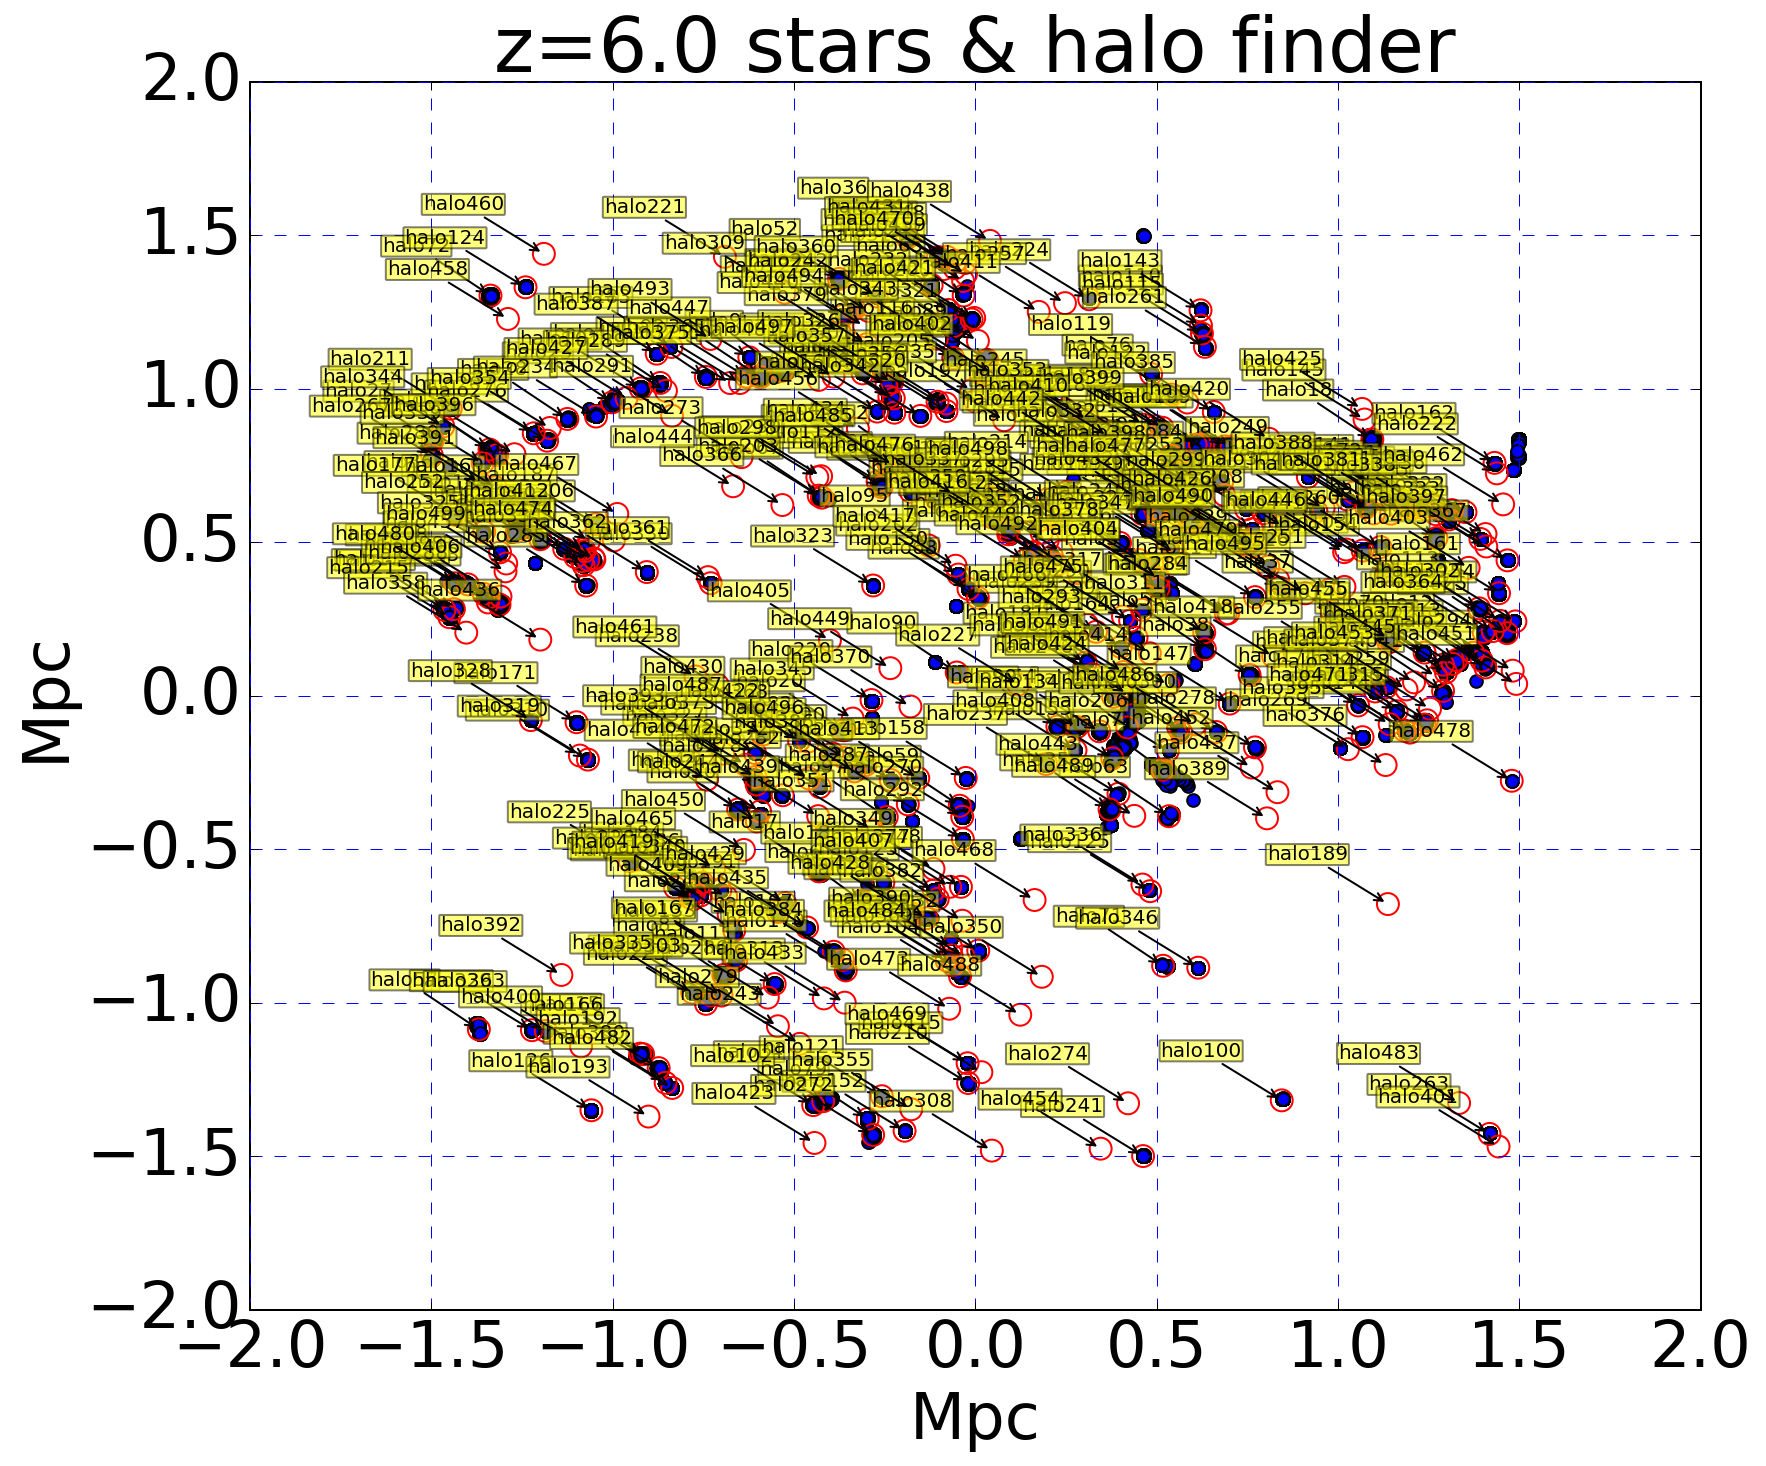

In [11]:
htp = min([minhalos,len(halosRawPos)])
labels = ['halo{0}'.format(i) for i in range(len(halosPos))]
plt.scatter(locs[:,0]/1000,locs[:,1]/1000,s=40,c='b') # Plot star particles
plt.scatter(halosPos[:htp,0]/1000,halosPos[:htp,1]/1000,s=120,facecolors='none', edgecolors='r') # Plot halo locs
plt.grid(b=True, which='major', color='b', linestyle='--')
plt.xlabel('Mpc')
plt.ylabel('Mpc')
# plt.xlim([-2,2])
# plt.ylim([-2,2])
plt.title('z=%.1lf stars & halo finder'%z)
for label, x, y in zip(labels, halosPos[:33,0]/1000,halosPos[:33,1]/1000):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',fontsize=10,
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

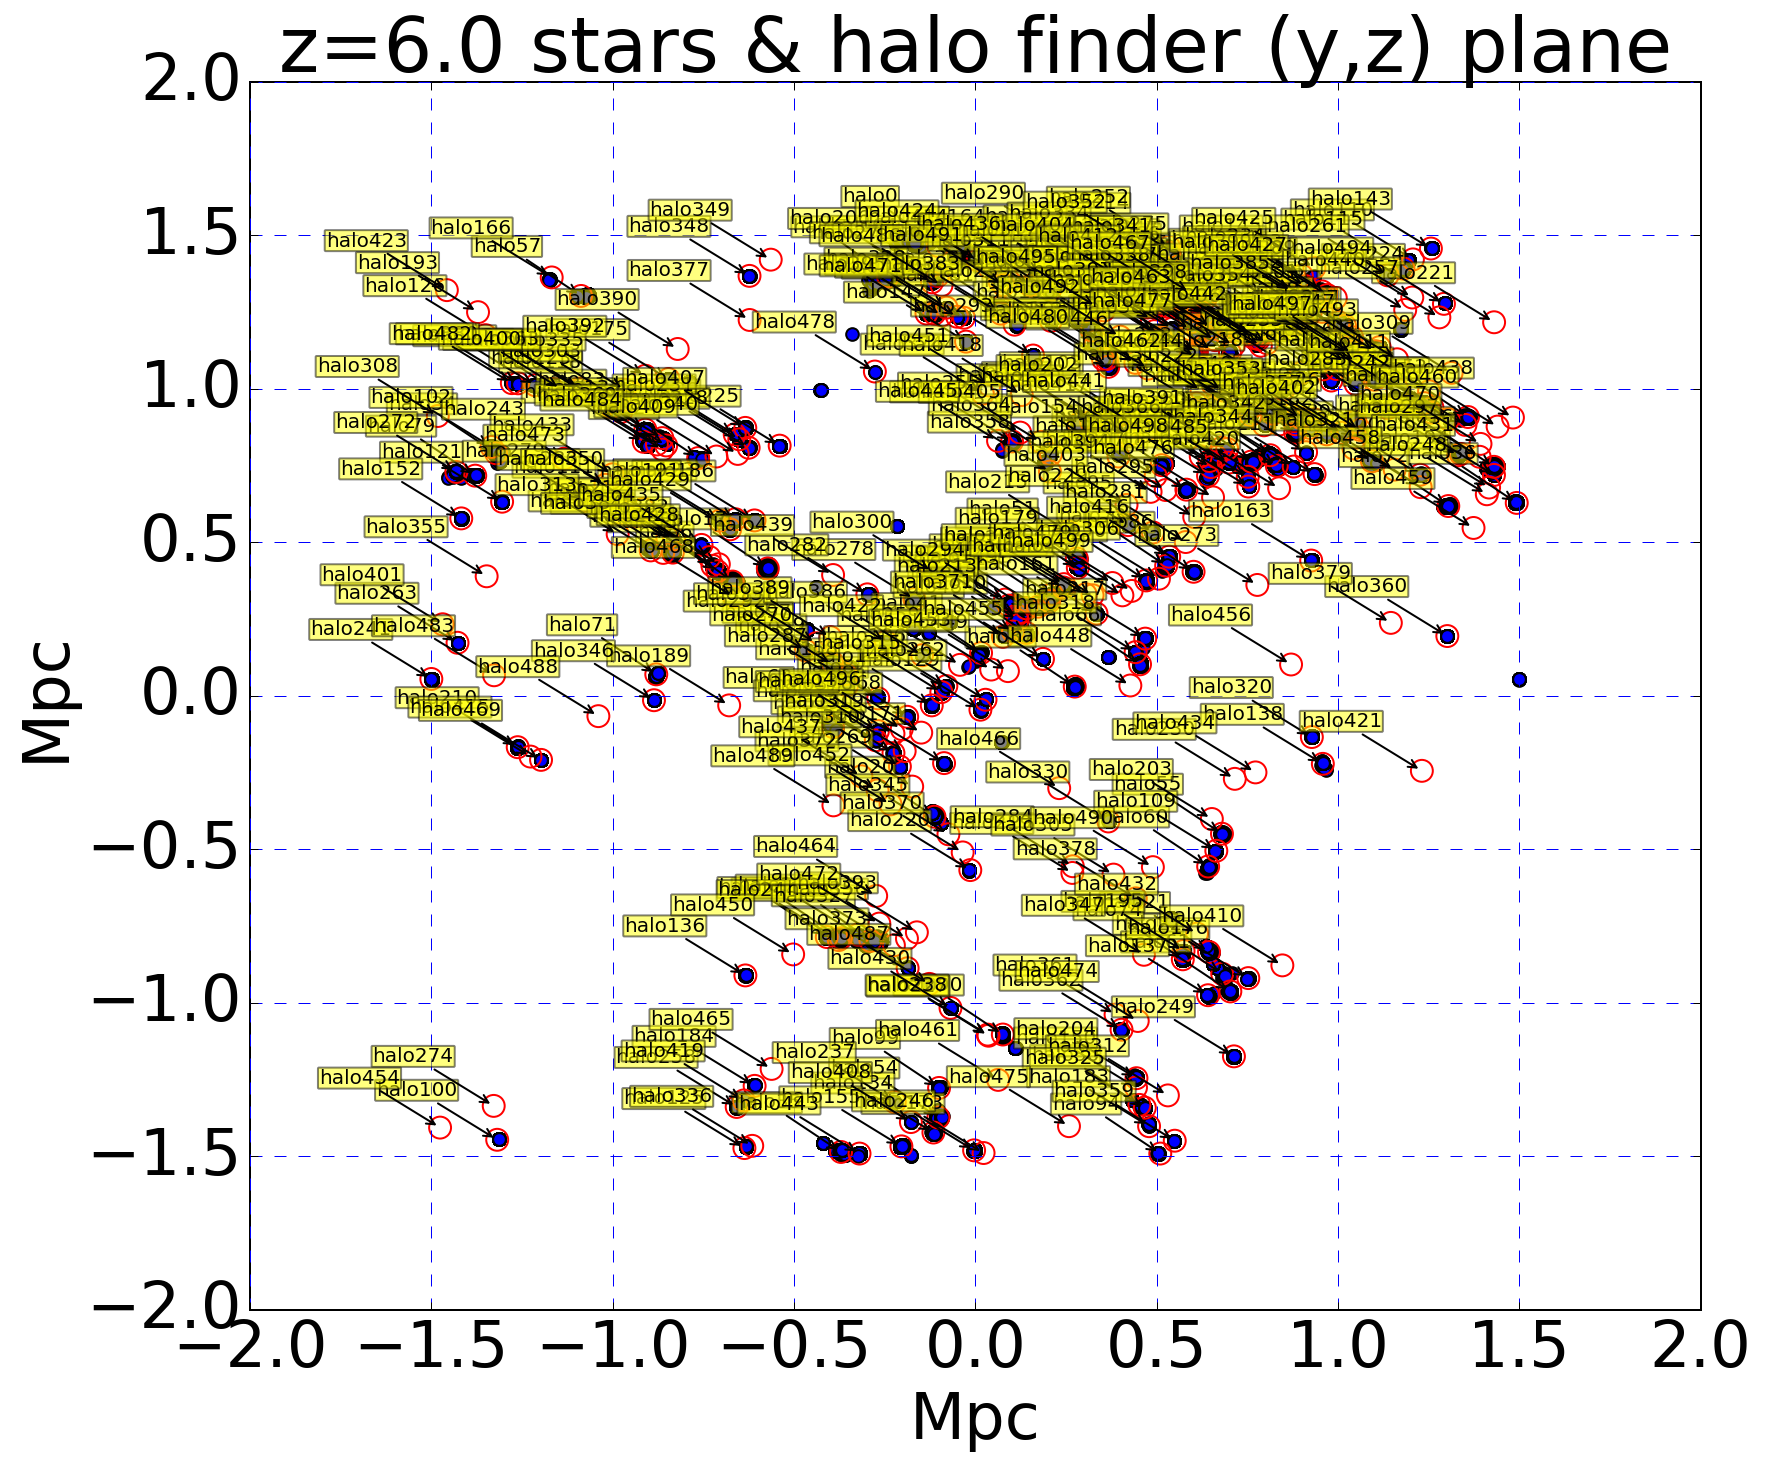

In [12]:
htp = min([minhalos,len(halosRawPos)])
labels = ['halo{0}'.format(i) for i in range(len(halosPos))]
plt.scatter(locs[:,1]/1000,locs[:,2]/1000,s=40,c='b') # Plot star particles
plt.scatter(halosPos[:htp,1]/1000,halosPos[:htp,2]/1000,s=120,facecolors='none', edgecolors='r') # Plot halo locs
plt.grid(b=True, which='major', color='b', linestyle='--')
plt.xlabel('Mpc')
plt.ylabel('Mpc')
# plt.xlim([-2,2])
# plt.ylim([-2,2])
plt.title('z=%.1lf stars & halo finder (y,z) plane'%z)
for label, x, y in zip(labels, halosPos[:htp,1]/1000,halosPos[:htp,2]/1000):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',fontsize=10,
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0

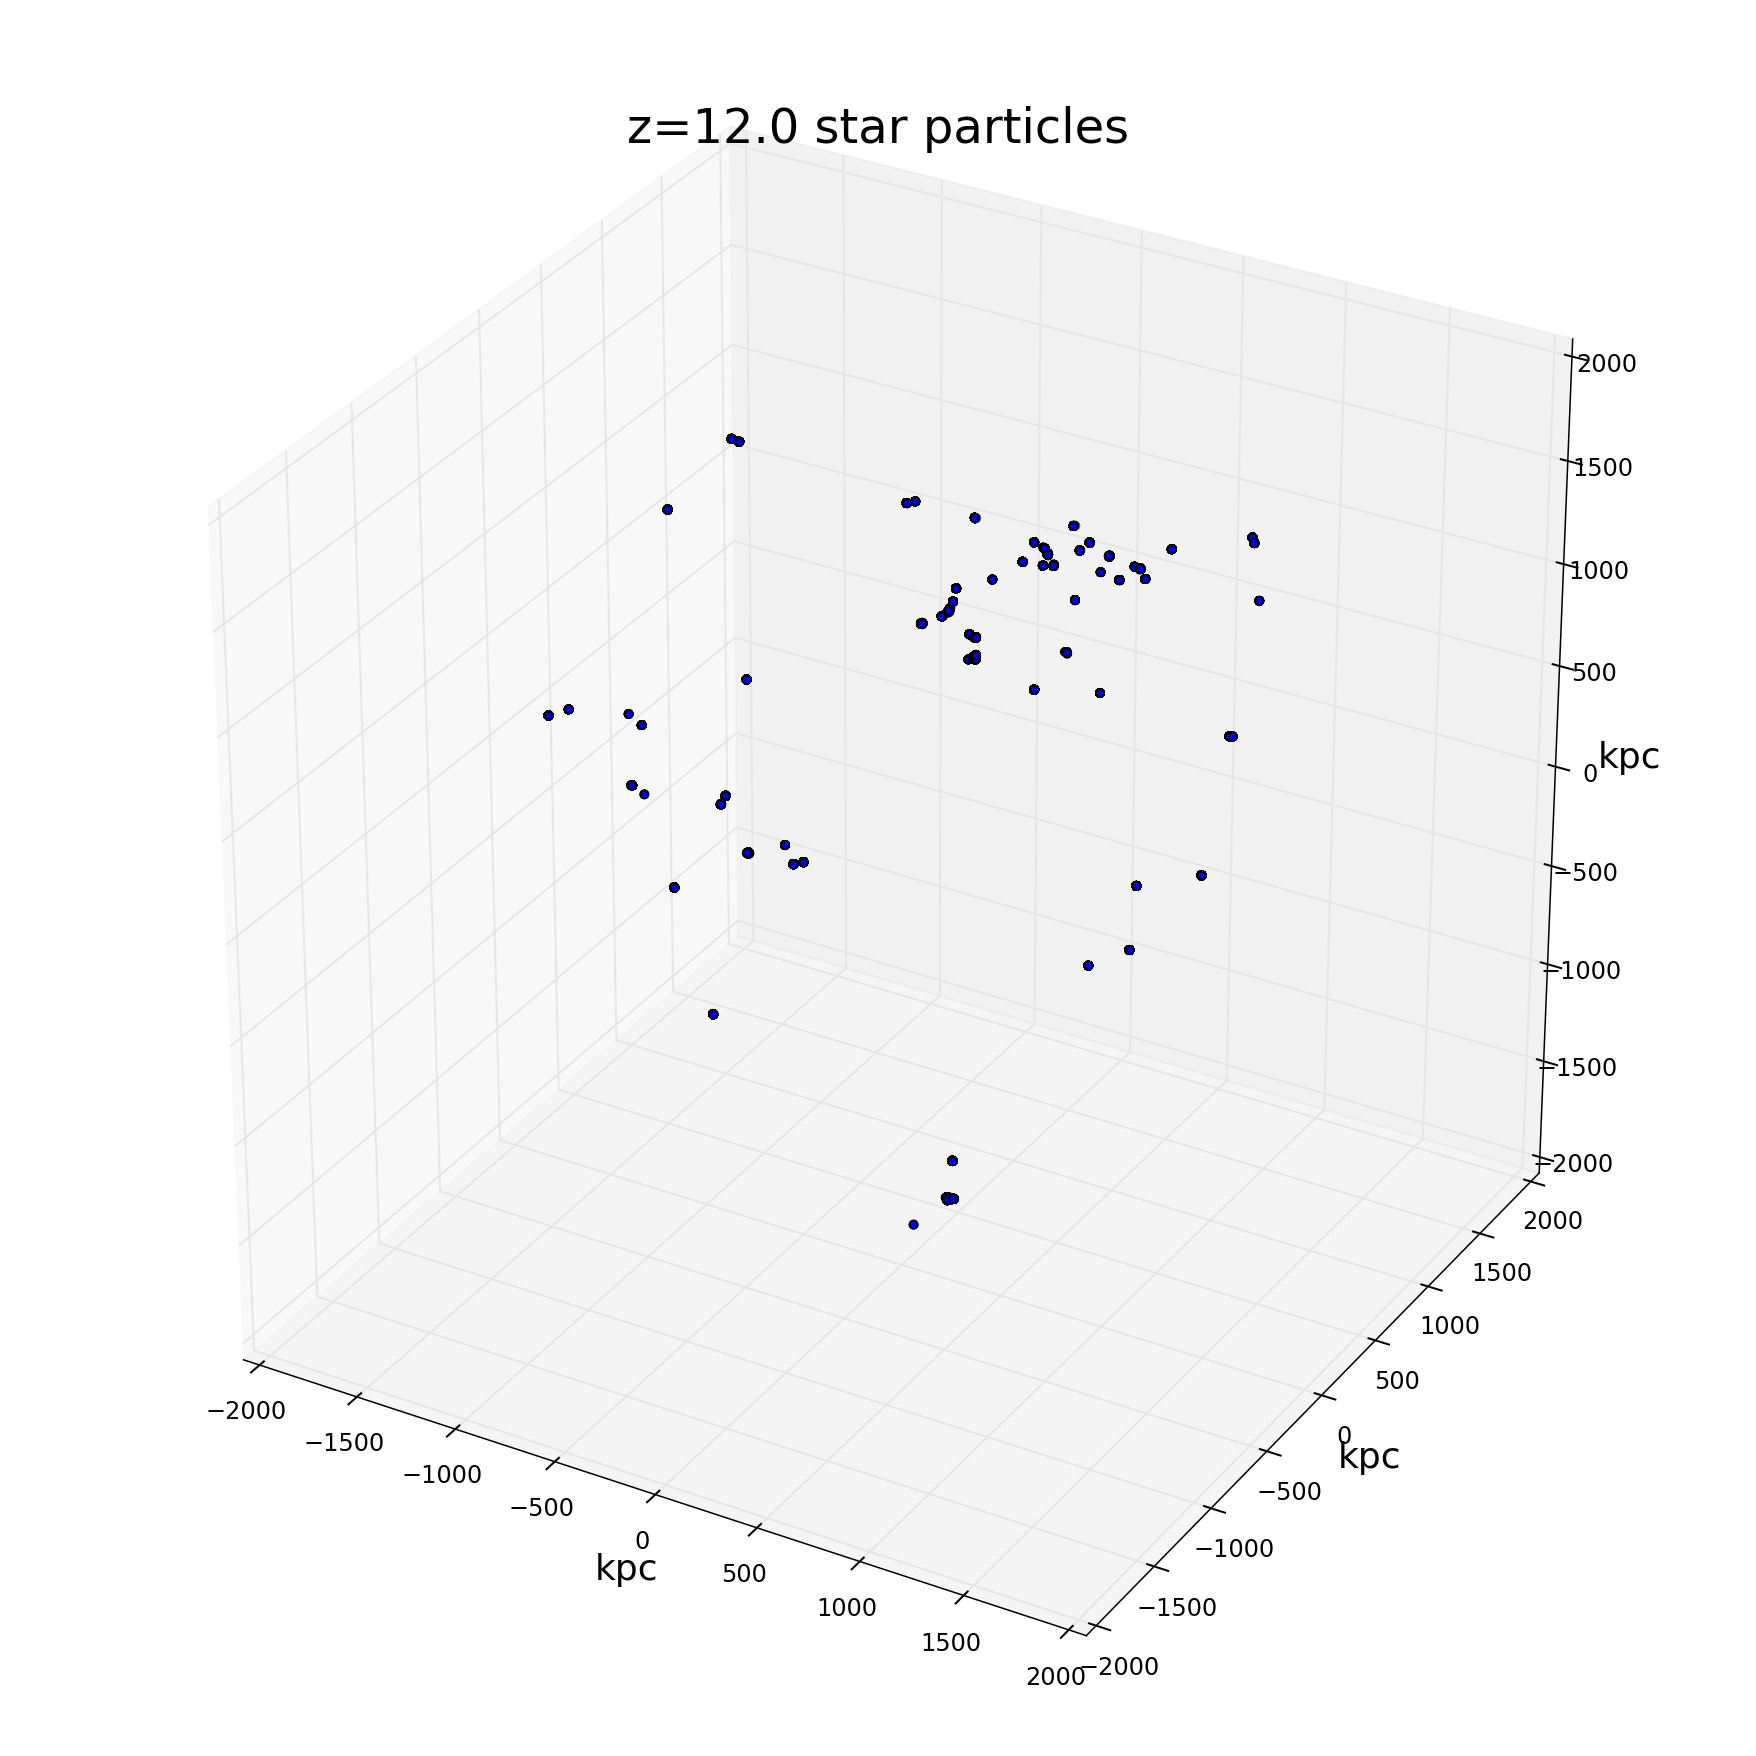

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

# labels = ['halo{0}'.format(i) for i in range(len(halosPos))]
# ax.scatter(halosPos[:htp,0],halosPos[:htp,1],halosPos[:htp,2],s=160,facecolor=(0,0,0,0), edgecolors='r') # Plot halo locs
ax.scatter(locs[:,0],locs[:,1],locs[:,2],s=15,c='b') # Plot star particles

ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.zaxis.label.set_size(18)

ax.set_xlabel('kpc')
ax.set_ylabel('kpc')
ax.set_zlabel('kpc')
ax.set_title('z=%.1lf star particles'%z,fontsize=24)
# for label, x, y, zz  in zip(labels, halosPos[:htp,0],halosPos[:htp,1],halosPos[:htp,2]):
#     ax.text(x,y,zz, label, size=10, color='y')    
fig.show()

gc.collect()

6820

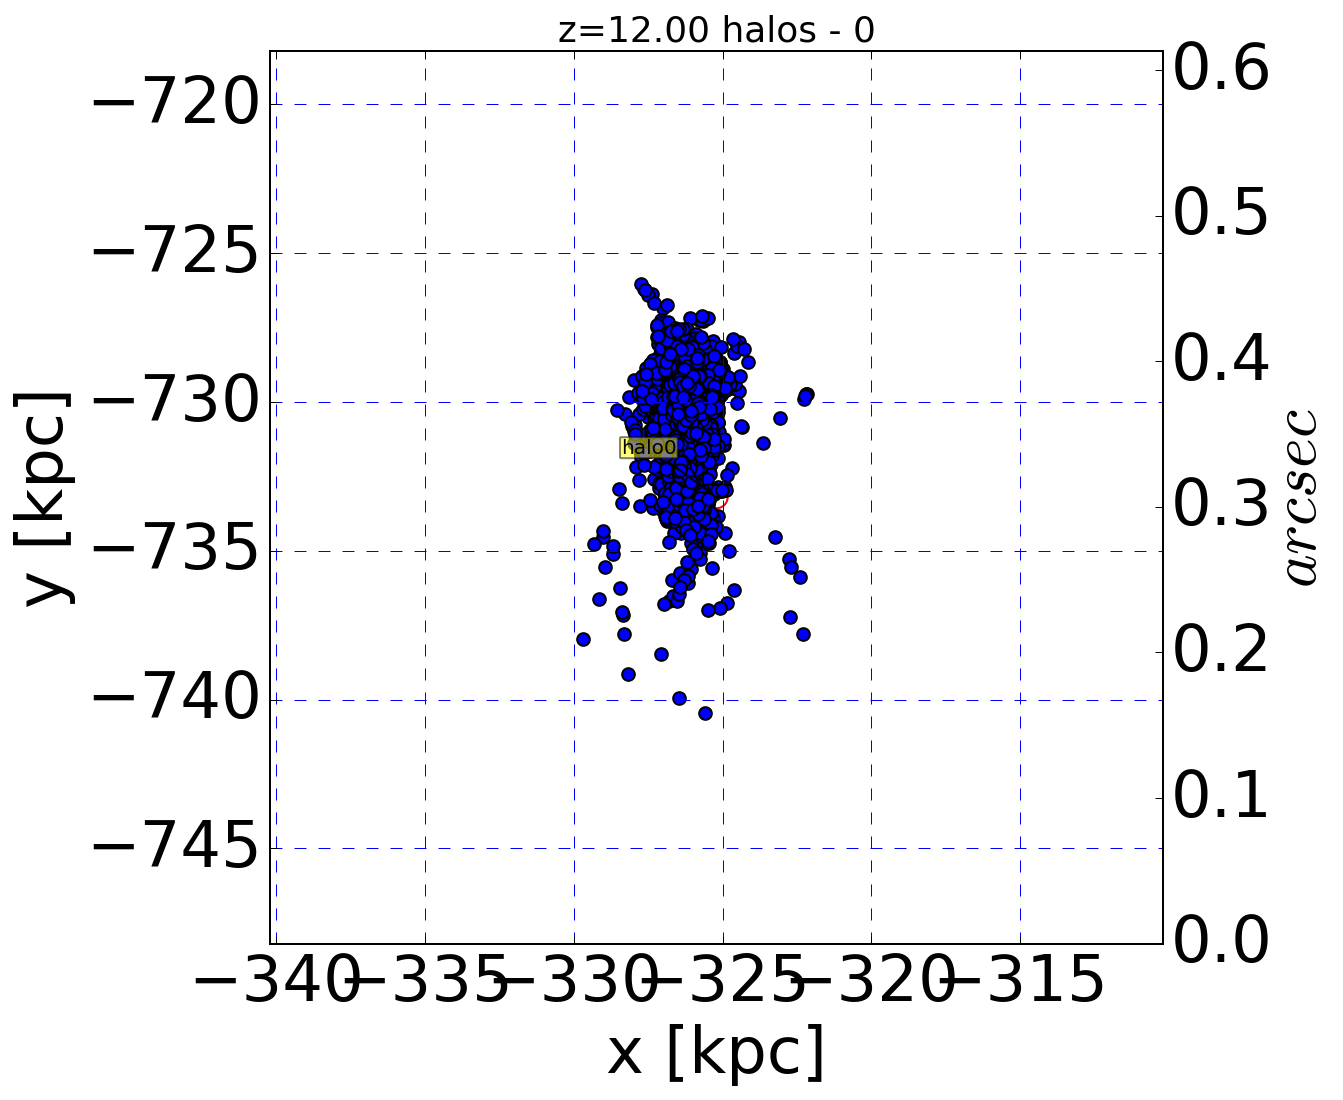

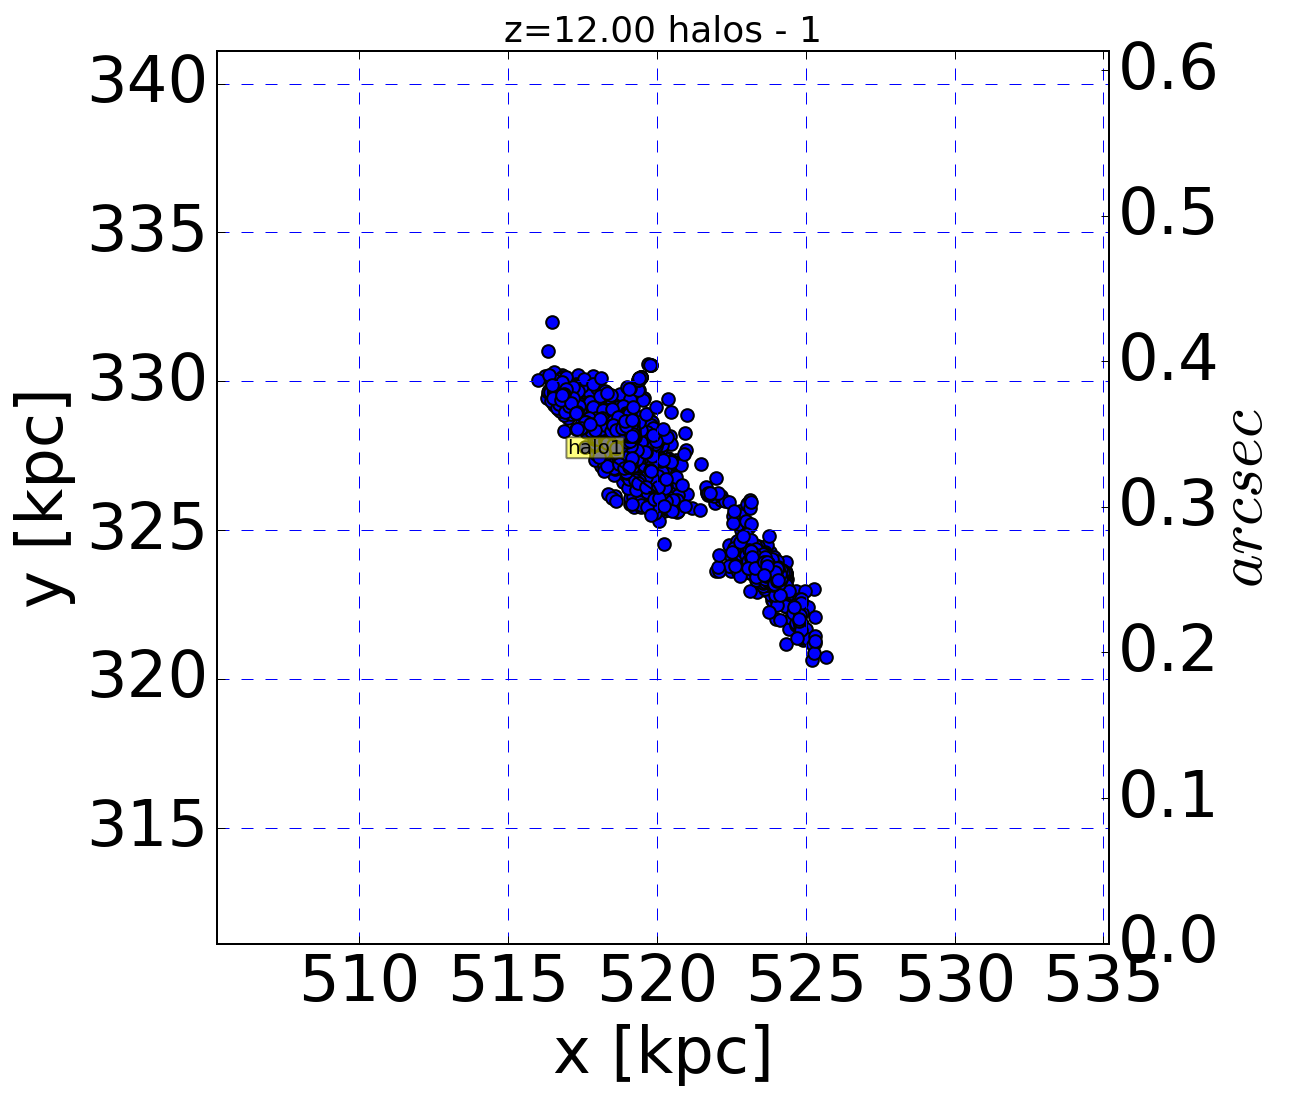

In [60]:
size = 30
arcSec_per_kpc_comov = myCosmo.arcsec_per_kpc_comoving(z=z).value 
for halo in range(2):
    ax=halos.pltView(locs,halosPos,halo,z,size)
    hax2 = ax.twinx()
    hax2.set_ylim([0,size * arcSec_per_kpc_comov])
    hax2.set_ylabel(r'$arcsec$')
    hax2.yaxis.labelpad = -3
gc.collect()

In [1]:
size = 15.0
arcSec_per_kpc_comov = myCosmo.arcsec_per_kpc_comoving(z=z).value # Note that we're per kpc here, corrected below
processedHalos = [] # Keeps track of unique halos processed
for indx in range(htp):
    # Load the stars for this halo
    haloStars,halomass,haloages,haloZ,haloPZ,haloPPF = halos.getHaloStars(locs,mass,spAges,Z,PZ,PPF,
                                                                          halosPos,indx,r=size)
    N = len(halomass)
    if (N == 0):
        print("skipping halo {}, empty".format(indx))
        continue
    totHaloMass = np.sum(halomass)
    if [N, totHaloMass] in processed: # Make sure we aren't processing same halo (with diff indx)
        print("***** skipping halo {}, same as previous",format(indx))
        continue
    
    processedHalos.append([N,totHaloMass])
    
    print("Stellar mass {:.4e} M_sun".format(np.sum(halomass)))
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    ax.scatter(0,0,s=120,facecolors='none', edgecolors='r') # Plot halo locs
    ax.scatter(haloStars[:,0],haloStars[:,1],s=40,c='b') # Plot star particles
    ax.grid(b=True, which='major', color='b', linestyle='--')
    ax.set_xlabel('x [kpc]')
    ax.set_ylabel('y [kpc]')

    ax.set_xlim([-np.linalg.norm([size,size,size]),np.linalg.norm([size,size,size])])
    ax.set_ylim([-np.linalg.norm([size,size,size]),np.linalg.norm([size,size,size])])

    ax.set_title('z=%.2lf halos - %d'%(z,indx),size=18)

    label = 'halo{0}'.format(indx)
    ax.annotate(
        label, 
        xy = (0,0), xytext = (-size/3, size/3),
        textcoords = 'offset points', ha = 'right', va = 'bottom',fontsize=10,
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
    hax2 = ax.twinx()
    hax2.set_ylim([0,size * arcSec_per_kpc_comov]) # Convert to arcsec per Mpc
    hax2.set_ylabel(r'$arcsec$')
    hax2.yaxis.labelpad = -3
    
    
    fig.savefig("z_{}_halo_{}_r_{}kpc.pdf".format(z,indx,size),dpi=fig.dpi,bbox_inches='tight')
    plt.close(fig)
    gc.collect()

NameError: name 'myCosmo' is not defined

In [59]:
np.linalg.norm([2,2]),np.sqrt(2**2 * 2)

(2.8284271247461903, 2.8284271247461903)

In [28]:
size = 15 # kpc
numZeros = 0
nonZeros = 0
for indx,h in enumerate(halosPos):
    halosplocs,halospmass,halospages,halospZ,halospPZ,halospPPF = halos.getHaloStars(locs,mass,spAges,Z,PZ,PPF,
                                                                          halosPos,indx,size)
    if (len(halospmass) > 0):
        nonZeros += 1
    else:
        numZeros += 1
print('Num zero len halos', numZeros)
print('Non-zero len halos', nonZeros)

Num zero len halos 11
Non zero len halos 9
